In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
import numpy as np

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
agg = (transcript.groupby(['age', 'person'])
         .agg({'person': 'nunique'})
      )
agg.groupby('age')['person'].count()

age
18       70
19      135
20      135
21      140
22      131
       ... 
98        5
99        5
100      12
101       5
118    2175
Name: person, Length: 85, dtype: int64

In [10]:
int(np.ceil(np.log2(17000-2175)) + 1)

15

In [11]:
bins= [18,24,29,35,40,46,51,57,62,68,73,79,84,90,95,102]
labels = ['18-23','24-28','29-34','35-39','40-45','45-50','51-56',\
          '57-61','62-67','68-72','73-78','79-83','84-89','90-94','95-101']
transcript['age_group']=pd.cut(transcript['age'], bins=bins, labels=labels,right=False)

In [12]:
transcript.groupby(['age_group'])['amount'].sum()

age_group
18-23      61711.58
24-28      58849.81
29-34      70381.91
35-39      95743.48
40-45     133467.80
45-50     150522.56
51-56     267417.85
57-61     226501.45
62-67     237465.54
68-72     143180.97
73-78     128005.82
79-83      76856.81
84-89      50139.64
90-94      25010.82
95-101      9686.36
Name: amount, dtype: float64

In [13]:
transcript.groupby(['age_group'])['person'].nunique()

age_group
18-23      737
24-28      708
29-34      811
35-39      844
40-45     1256
45-50     1337
51-56     2137
57-61     1762
62-67     1848
68-72     1174
73-78      992
79-83      558
84-89      390
90-94      201
95-101      70
Name: person, dtype: int64

In [14]:
#Link: https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8
#bin count by Sturges Rule: Sturges' formula: K = log2 N + 1.
#will not count users with age 118 because they omitted age, gender, or income

In [15]:
tran=transcript.groupby(['age_group','age'])['amount'].sum()/transcript.groupby(['age_group','age'])['person'].nunique()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age_group','age','avg_dollars_spent']
avg_spend_by_age

,age_group,age,avg_dollars_spent
0,18-23,18,80.465286
1,18-23,19,71.889778
2,18-23,20,76.888148
3,18-23,21,98.846357
4,18-23,22,94.175725
...,...,...,...
1270,95-101,98,74.076000
1271,95-101,99,168.376000
1272,95-101,100,169.395000
1273,95-101,101,175.586000


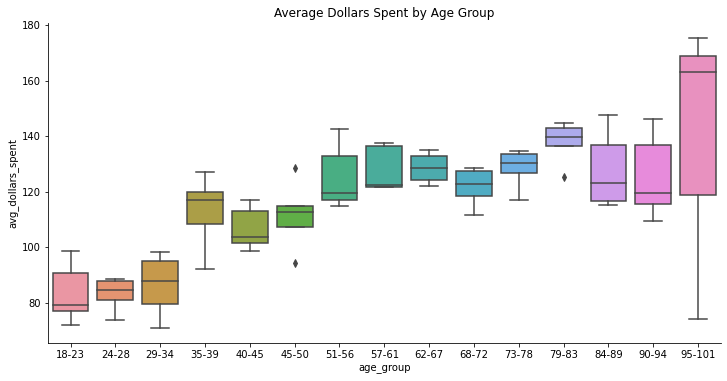

In [16]:
sns.catplot(data=avg_spend_by_age, x="age_group", y="avg_dollars_spent",kind='box', height=5, aspect=2)
plt.title("Average Dollars Spent by Age Group")
plt.show()

In [17]:
#Rebinning into 5 groups
bins= [18,34,51,68,84,102]
labels = ['18-34','35-50','51-67','68-83','84-101']
transcript['age_group2']=pd.cut(transcript['age'], bins=bins, labels=labels,right=False)

In [18]:
transcript.groupby(['age_group2'])['amount'].sum()

age_group2
18-34     178459.88
35-50     392217.26
51-67     731384.84
68-83     348043.60
84-101     84836.82
Name: amount, dtype: float64

In [19]:
transcript.groupby(['age_group2'])['person'].nunique()

age_group2
18-34     2109
35-50     3584
51-67     5747
68-83     2724
84-101     661
Name: person, dtype: int64

In [20]:
tran=transcript.groupby(['age_group2','age'])['amount'].sum()/transcript.groupby(['age_group2','age'])['person'].nunique()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age_group2','age','avg_dollars_spent']
avg_spend_by_age

,age_group2,age,avg_dollars_spent
0,18-34,18,80.465286
1,18-34,19,71.889778
2,18-34,20,76.888148
3,18-34,21,98.846357
4,18-34,22,94.175725
...,...,...,...
420,84-101,98,74.076000
421,84-101,99,168.376000
422,84-101,100,169.395000
423,84-101,101,175.586000


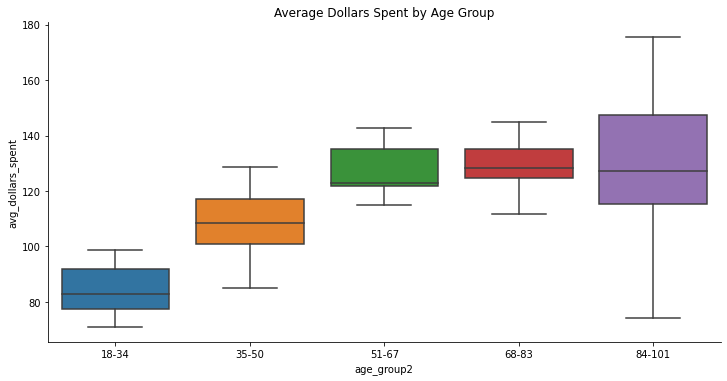

In [21]:
sns.catplot(data=avg_spend_by_age, x="age_group2", y="avg_dollars_spent",kind='box', height=5, aspect=2)
plt.title("Average Dollars Spent by Age Group")
plt.show()

In [24]:
tran=transcript.groupby(['age_group2'])['amount'].sum()/transcript.groupby(['age_group2'])['person'].nunique()
avg_spend_by_age=pd.DataFrame(tran).reset_index()
avg_spend_by_age.columns =['age_group2','avg_dollars_spent']
avg_spend_by_age

,age_group2,avg_dollars_spent
0,18-34,84.618246
1,35-50,109.435619
2,51-67,127.263762
3,68-83,127.769310
4,84-101,128.346172
